In [638]:
import pandas as pd
import matplotlib.pyplot as plt

LOCATION_PROCESSED = 'data_processed'
LOCATION_SURVEY = f'{LOCATION_PROCESSED}/survey_responses.csv'
LOCATION_QUESTIONS = f'{LOCATION_PROCESSED}/questions_processed.csv'

In [639]:
# load the survey data
survey = pd.read_csv(LOCATION_SURVEY, index_col=0)
survey.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,18-24,Male,Denmark,Undergraduate,Finance / Accounting,Once every three months,Strongly disagree,Agree,Neither agree nor disagree,Food and Beverages,...,No,2.0,Maybe,3.0,No,1.0,Yes,4.0,No,3.0
1,25-34,Female,United States,Part-time Employee,Other,Once every three months,Agree,Strongly agree,Agree,Toys and Games|Books and Media,...,Maybe,3.0,Yes,5.0,Yes,1.0,Yes,1.0,No,3.0
2,25-34,Male,Denmark,Unemployed,Technology / IT,Rarely / Never,Strongly disagree,Strongly disagree,Strongly disagree,NaN,...,Yes,5.0,Maybe,3.0,Yes,5.0,No,3.0,No,3.0
3,25-34,Male,Denmark,Graduate / Postgraduate,Technology / IT,Once a month,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Electronics and Gadgets|Toys and Games|Health ...,...,No,3.0,Maybe,3.0,Maybe,2.0,Maybe,2.0,No,3.0
4,25-34,Male,Finland,Undergraduate,Finance / Accounting,Once every three months,Disagree,Agree,Agree,Electronics and Gadgets|Clothing and Accessories,...,Yes,4.0,No,3.0,Yes,4.0,Maybe,3.0,No,3.0


In [640]:
# load questions
df_questions = pd.read_csv(LOCATION_QUESTIONS, index_col=0)
df_questions.tail()

,title,type,options,required,placeholder,subtitle,shuffle,strategy,taxonomicalParentIndex,shortStrategy,example,page,strategy_index,taxonomicalParent
id,,,,,,,,,,,,,,
57,How effective do you perceive this strategy to...,RangeInput,"['1', '2', '3', '4', '5']",False,NaN,Rate on scale from 1 (Not effective) to 5 (Ver...,NaN,"Reflect on time, space and environmental cost ...",3.0,Eco Impact Check,"Before completing a purchase, you reflect on t...",3,19.0,Mindful Awareness
58,Have you tried this strategy before?,RadioInput,"['Yes', 'No', 'Maybe']",True,NaN,NaN,NaN,Remind yourself of the corporations agenda and...,3.0,Corporate Reflection,"Before completing a purchase, you zoom out of ...",3,20.0,Mindful Awareness
59,How effective do you perceive this strategy to...,RangeInput,"['1', '2', '3', '4', '5']",False,NaN,Rate on scale from 1 (Not effective) to 5 (Ver...,NaN,Remind yourself of the corporations agenda and...,3.0,Corporate Reflection,"Before completing a purchase, you zoom out of ...",3,20.0,Mindful Awareness
60,Have you tried this strategy before?,RadioInput,"['Yes', 'No', 'Maybe']",True,NaN,NaN,NaN,"When purchasing, ask yourself which feelings y...",3.0,Emotionally Self-aware,"You are in the midst of ordering clothes, but ...",3,21.0,Mindful Awareness
61,How effective do you perceive this strategy to...,RangeInput,"['1', '2', '3', '4', '5']",False,NaN,Rate on scale from 1 (Not effective) to 5 (Ver...,NaN,"When purchasing, ask yourself which feelings y...",3.0,Emotionally Self-aware,"You are in the midst of ordering clothes, but ...",3,21.0,Mindful Awareness


In [641]:
#Question checker!

ID = 62

df_questions = pd.read_csv(LOCATION_QUESTIONS, index_col=0)
question = df_questions.loc[df_questions.index == ID]
print(question)


Empty DataFrame
Columns: [title, type, options, required, placeholder, subtitle, shuffle, strategy, taxonomicalParentIndex, shortStrategy, example, page, strategy_index, taxonomicalParent]
Index: []


In [642]:
# Laver lige den der effort ting
effort_mapping = {"Yes": 1, "No": 0, "Maybe": 0.5}

methods_tried_ids = [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
methods_tried_cols = [str(qid) for qid in methods_tried_ids if str(qid) in survey.columns]

# Ny column
methods_tried_data = survey[methods_tried_cols]
methods_tried_numeric = methods_tried_data.replace(effort_mapping)

# Der bliver krænket strenge
methods_tried_numeric = methods_tried_numeric.apply(pd.to_numeric, errors='coerce').fillna(0)

# Average effort
survey["Effort"] = methods_tried_numeric.mean(axis=1)

# Display all the effort
survey["Effort"].head()


0    0.571429
1    0.619048
2    0.523810
3    0.333333
4    0.500000
Name: Effort, dtype: float64

In [643]:
# Likert scale til numeric
likert_mapping = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
}

# Question id 7 is "I find it hard to resist...."
survey["shopaholicness"] = survey["7"].replace(likert_mapping).fillna(0)
survey["shopaholicness"]


0      1
1      4
2      1
3      3
4      2
      ..
216    1
217    4
218    2
219    3
220    4
Name: shopaholicness, Length: 204, dtype: int64

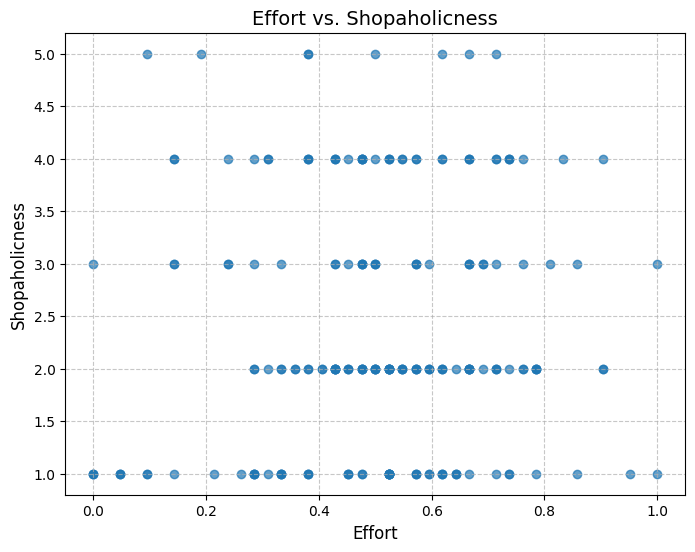

In [644]:

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(survey["Effort"], survey["shopaholicness"], alpha=0.7)
plt.title("Effort vs. Shopaholicness", fontsize=14)
plt.xlabel("Effort", fontsize=12)
plt.ylabel("Shopaholicness", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


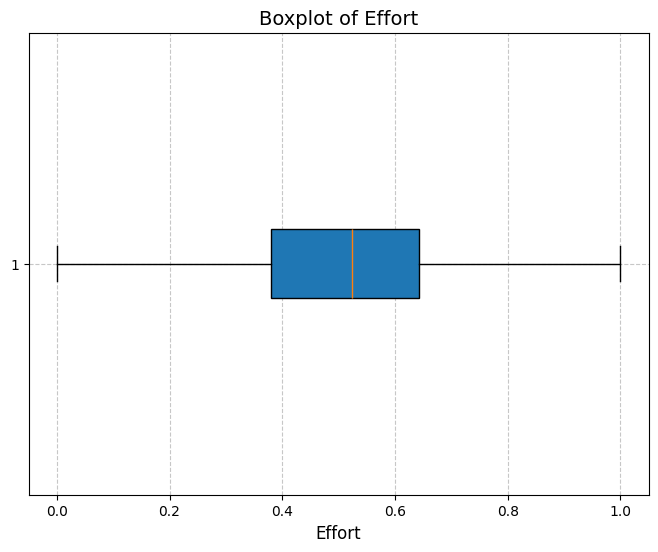

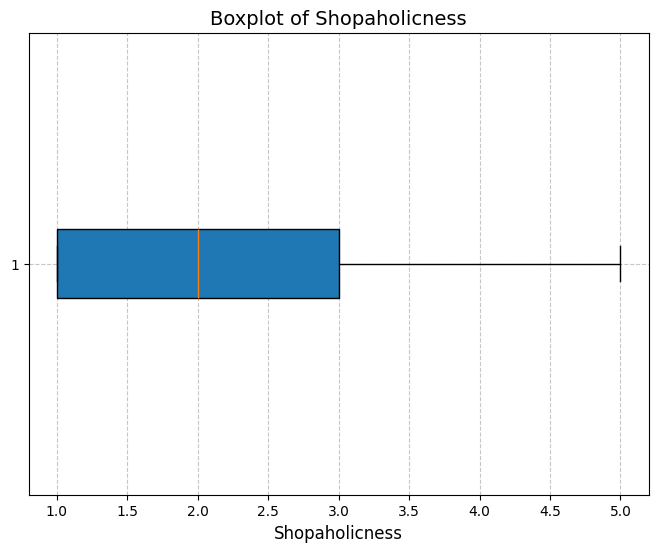

In [645]:
# General distribution of Effort and Shopaholicness


# Boxplot for Effort
plt.figure(figsize=(8, 6))
plt.boxplot(survey["Effort"].dropna(), vert=False, patch_artist=True)
plt.title("Boxplot of Effort", fontsize=14)
plt.xlabel("Effort", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Shopaholicness
plt.figure(figsize=(8, 6))
plt.boxplot(survey["shopaholicness"].dropna(), vert=False, patch_artist=True)
plt.title("Boxplot of Shopaholicness", fontsize=14)
plt.xlabel("Shopaholicness", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [646]:
import json
import circlify

data = './data_processed/hierarchical_structure.json'

with open('./data_processed/hierarchical_structure.json', 'r') as f:
    data = json.load(f)

print(data)

# Recursive function to calculate and assign "datum" for parent nodes
def calculate_parent_datum(node):
    if "children" in node:
        # Sum the "datum" of all children
        node["datum"] = sum(calculate_parent_datum(child) for child in node["children"])
    return node["datum"]

# Apply the function to the root node
calculate_parent_datum(data[0])


# Pass the entire data structure to circlify
circles = circlify.circlify(
    data,
    show_enclosure=True,  # Show the top-level parent enclosure
    target_enclosure=circlify.Circle(x=0, y=0, r=2.5)
)


[{'id': 'Online Impulsive Shopping Reduction', 'datum': 247, 'children': [{'id': 'Financial Discipline', 'datum': 16, 'children': [{'id': 'Create a budget and limit spending on specific categories', 'datum': 16}]}, {'id': 'Self-Control', 'datum': 45, 'children': [{'id': 'Remove advertisements', 'datum': 5}, {'id': 'Block webshop/shop-app or disable checkout', 'datum': 12}, {'id': 'Remind user to do free alternatives over shopping', 'datum': 28}]}, {'id': 'Assess Quality', 'datum': 24, 'children': [{'id': 'Read about item reviews to judge quality', 'datum': 1}, {'id': 'Ask yourself if this is a quality product with a long lifespan', 'datum': 23}]}, {'id': 'Decision Postponing', 'datum': 40, 'children': [{'id': 'Postpone purchase, create a waiting list', 'datum': 30}, {'id': 'Delete saved credit card information', 'datum': 2}, {'id': 'Only allow buying within a time-window', 'datum': 1}, {'id': 'Set a maximum items to buy over a given time', 'datum': 7}]}, {'id': 'Resource Sharing', 'dat

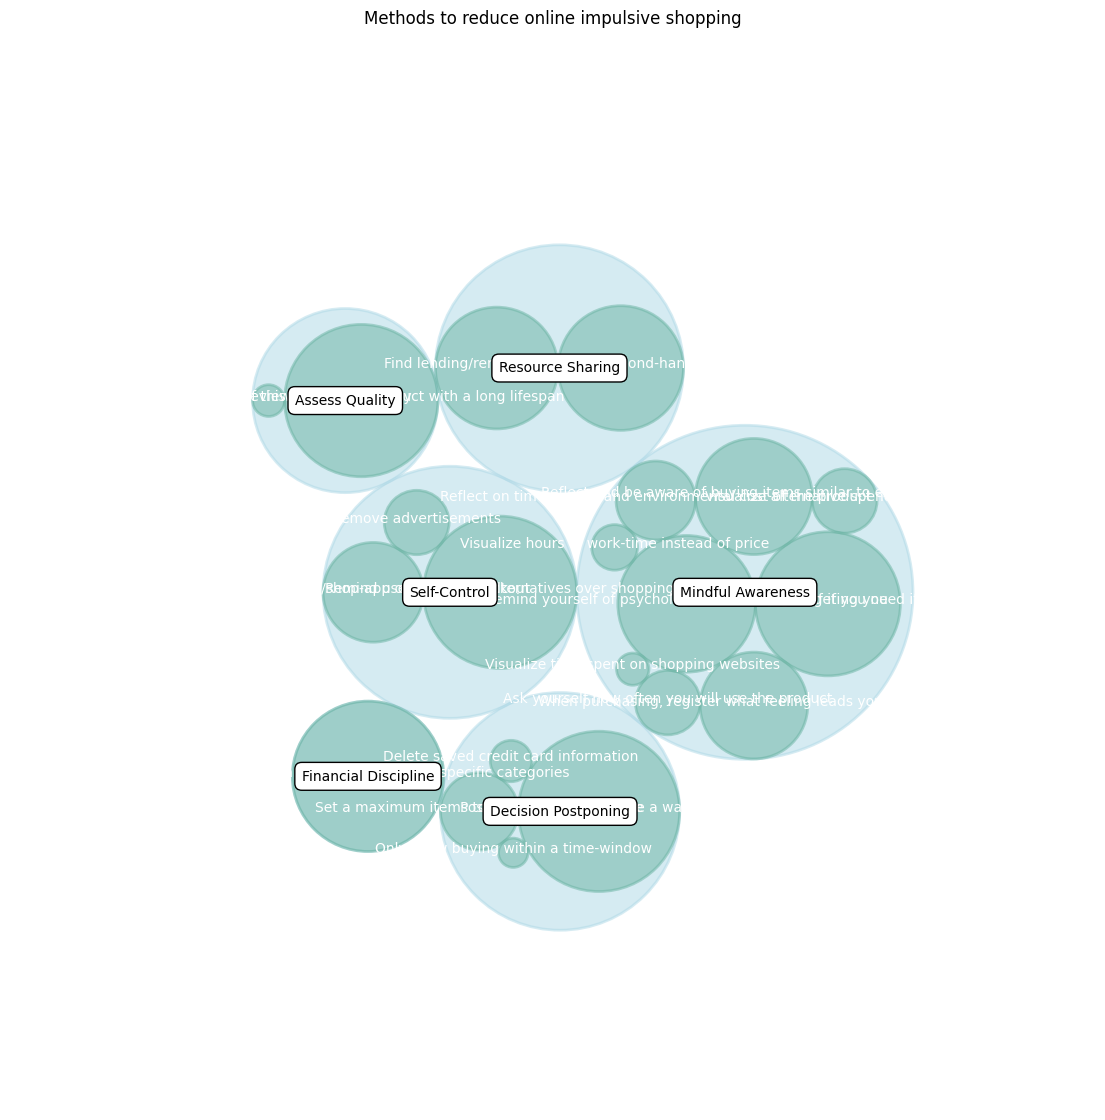

In [647]:

import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14, 14))

# Title
ax.set_title('Methods to reduce online impulsive shopping')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim * 1.5, lim * 1.5)  # Slightly increase the boundary to account for small circles
plt.ylim(-lim * 1.5, lim * 1.5)


# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x, y), ha='center', color="white")

# Print labels for the lower levels
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x, y), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

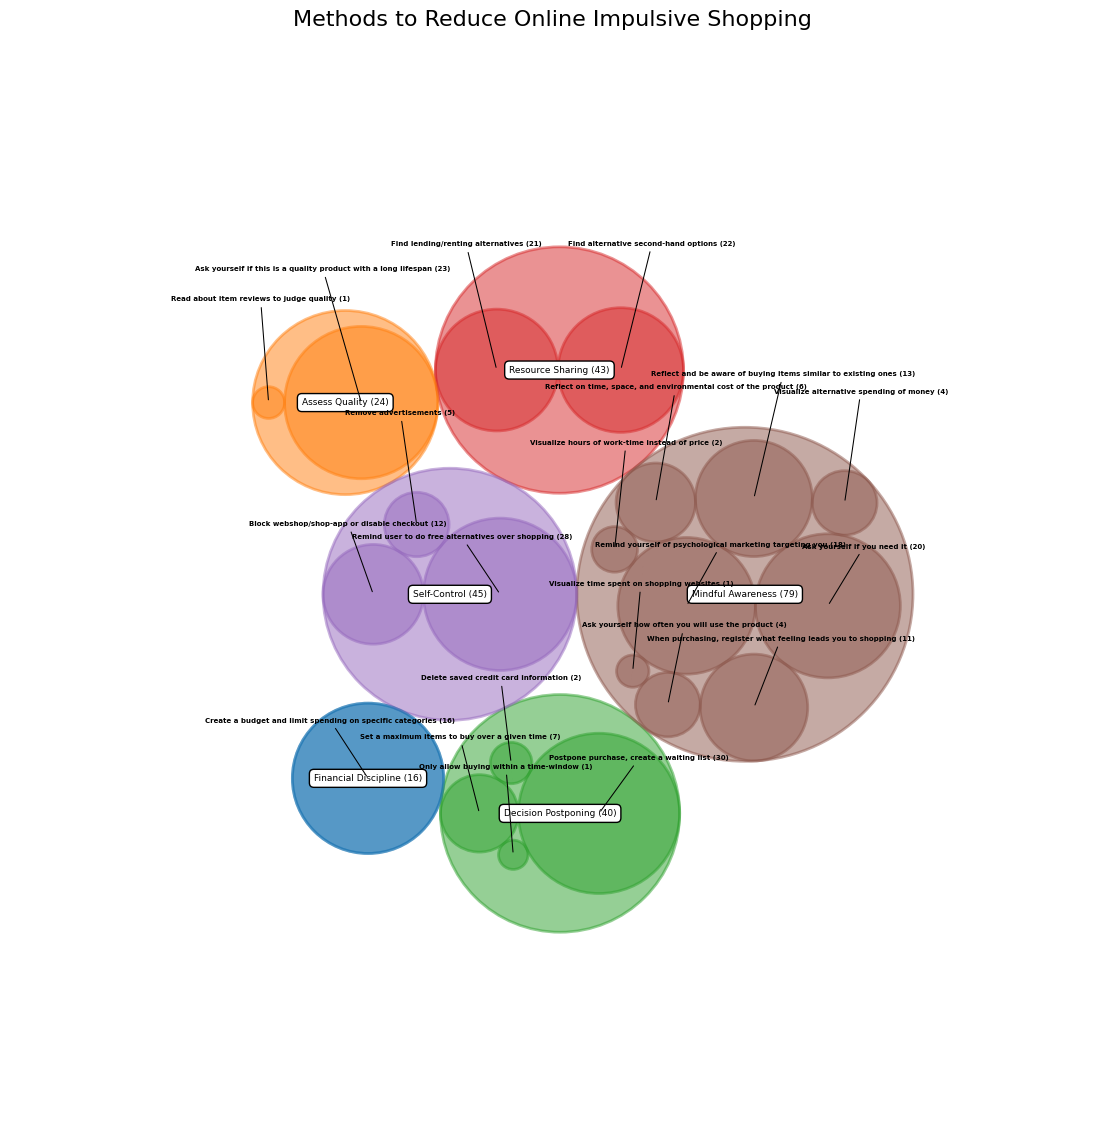

In [655]:
import json
import circlify
import matplotlib.pyplot as plt
from matplotlib.cm import tab10
import numpy as np  # For dynamic label positioning

# Load the JSON data
data_file = './data_processed/hierarchical_structure.json'

with open(data_file, 'r') as f:
    data = json.load(f)

# Recursive function to calculate and assign "datum" for parent nodes
# Also builds a mapping of child ID to parent ID
parent_map = {}

def calculate_parent_datum(node, parent_id=None):
    if "children" in node:
        # Map children to their parent
        for child in node["children"]:
            parent_map[child["id"]] = node["id"]
            calculate_parent_datum(child, node["id"])
        # Sum the "datum" of all children
        node["datum"] = sum(child["datum"] for child in node["children"])
    return node["datum"]

# Apply the function to the root node
calculate_parent_datum(data[0])

# Generate circles
circles = circlify.circlify(
    data,
    show_enclosure=True,
    target_enclosure=circlify.Circle(x=0, y=0, r=2.5)
)

# Prepare unique colors for top-level circles
top_level_circles = [circle for circle in circles if circle.level == 2]
colors = tab10.colors[:len(top_level_circles)]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Methods to Reduce Online Impulsive Shopping', fontsize=16)
ax.axis('off')

# Set plot limits
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim * 1.5, lim * 1.5)
plt.ylim(-lim * 1.5, lim * 1.5)

# Build a color map for top-level IDs
color_map = {}
for idx, circle in enumerate(top_level_circles):
    x, y, r = circle
    color_map[circle.ex["id"]] = colors[idx]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2, color=colors[idx]))
    label = f"{circle.ex['id']} ({circle.ex['datum']})"
    plt.annotate(label, (x, y), va='center', ha='center', fontsize=6.5, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

# Draw and label child circles
for circle in circles:
    if circle.level == 3:
        x, y, r = circle
        label = f"{circle.ex['id']} ({circle.ex['datum']})"
        parent_id = parent_map.get(circle.ex["id"])
        color = color_map.get(parent_id, "#69b3a2")  # Default color if no parent
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2, color=color))
        
        # Offset labels dynamically based on circle size
        offset_x = r * 0.5 * np.sign(x)  # Offset proportional to radius and x direction
        offset_y = r * 0.5 * np.sign(y)  # Offset proportional to radius and y direction

        # Seeded random for reproducibility
        rng = np.random.default_rng(seed=6969) 
        randomOffset = rng.uniform(0, 1)
        
        plt.annotate(
            label, 
            (x, y), 
            xytext=(x + offset_x, y + offset_y + randomOffset),  # Offset label position
            ha='center', 
            fontsize=5,  # Smaller font size for child labels
            weight='bold',  # Bold font weight
            color="black",
            arrowprops=dict(arrowstyle='-', color='black', lw=0.75)  # Optional: add a pointer line
        )


plt.show()


IndexError: tuple index out of range

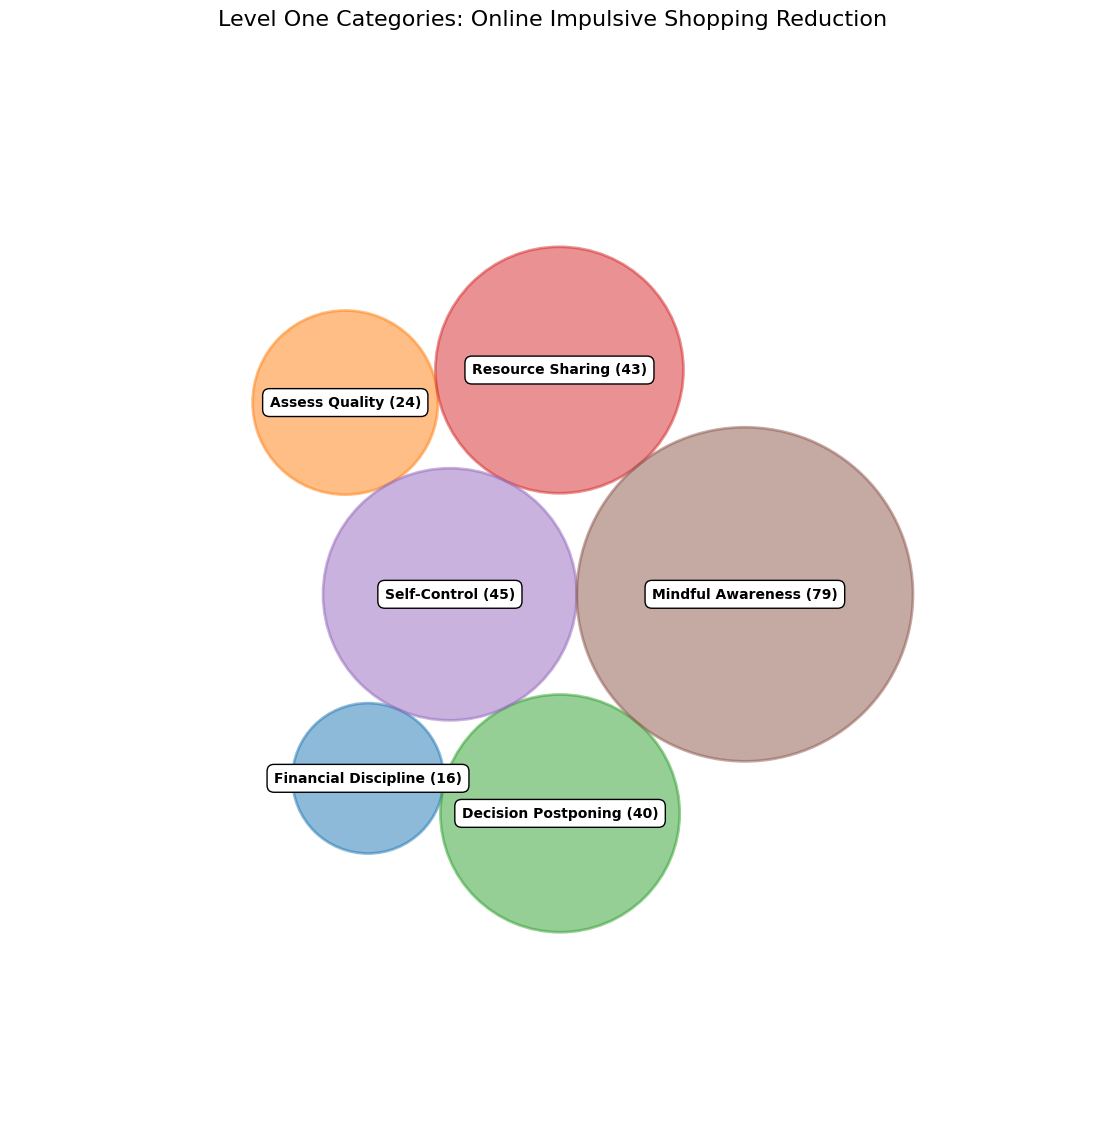

In [656]:
import json
import circlify
import matplotlib.pyplot as plt
from matplotlib.cm import tab10

# Load the JSON data
data_file = './data_processed/hierarchical_structure.json'

with open(data_file, 'r') as f:
    data = json.load(f)

# Recursive function to calculate and assign "datum" for parent nodes
def calculate_parent_datum(node):
    if "children" in node:
        # Sum the "datum" of all children
        node["datum"] = sum(calculate_parent_datum(child) for child in node["children"])
    return node["datum"]

# Apply the function to the root node
calculate_parent_datum(data[0])

# Generate circles for level one categories only
level_one_data = [
    {"id": child["id"], "datum": child["datum"]}
    for child in data[0]["children"]
]

circles = circlify.circlify(
    level_one_data,
    show_enclosure=True,
    target_enclosure=circlify.Circle(x=0, y=0, r=2.5)
)

# Prepare unique colors for level one categories
colors = tab10.colors[:len(level_one_data)]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Level One Categories: Online Impulsive Shopping Reduction', fontsize=16)
ax.axis('off')

# Set plot limits
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim * 1.5, lim * 1.5)
plt.ylim(-lim * 1.5, lim * 1.5)

# Draw and label level one circles
for idx, circle in enumerate(circles):
    x, y, r = circle
    color = colors[idx]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2, color=color))
    label = f"{circle.ex['id']} ({circle.ex['datum']})"
    plt.annotate(
        label,
        (x, y),
        va='center',
        ha='center',
        fontsize=10,
        weight='bold',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5)
    )

plt.show()
